## 検証データセットの作成

### -単純なホールドアウト法・k分割交差検証・シャッフルに基づく反復的なk分割交差検証-

### 1.単純なホールドアウト法

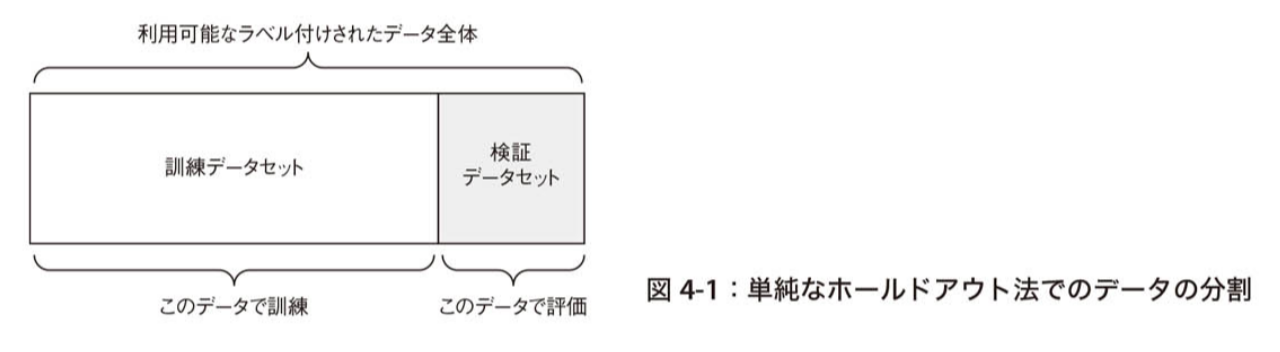

In [8]:
# 画像の表示
from IPython.display import Image
Image(filename='00.png', width=600)

### 2.k分割交差検証

In [18]:
data = np.arange(0, 10000)

k = 4
num_validation_samples = len(data) // k
# print(num_validation_samples)
# np.random.shuffle(data)
validation_scores = list()

for fold in range(k):
    
    # 検証データを選択
    validation_data = data[num_validation_samples * fold:
                            num_validation_samples * (fold + 1)]
    
    print(validation_data)
    
    # 残りを訓練データとして使用
    training_data = data[:num_validation_samples * fold] + data[num_validation_samples * fold:]
    
    # 新しいモデル
    model = get_model()
    # モデルを訓練
    model.train(training_data)
    
    # 検証スコアを算出
    validation_score = model.evaluate(validation_data)
    validation_scores.append(validation_score)
    validation_socre = np.average(validation_scores)
    
    # テストにまったく使用していないデータで最終的なモデルを訓練
    model = get_model()
    model.train(data)
    test_score = model.evaluate(test_data)

[   0    1    2 ... 2497 2498 2499]


ValueError: operands could not be broadcast together with shapes (0,) (10000,) 

### シャッフルに基づく反復的なk分割交差検証

k分割交差検証を複数回適用。<br>
データをK個のフォールドに分割する前に、その都度データをシャッフルする。<br>
最終的なスコアは、K分割交差検証を実行するたびに取得したモデル。<br>

・注意すべき点<br>
データの典型性:ランダムにシャッフルする。<br>
時間の矢:過去に基づいているときはシャッフルしない。<br>
データの冗長性:素であること<br>

### データ前処理、特徴エンジニアリング、表現学習

ここでは、全ての問題領域のデータに共通する基本的な手法を紹介<br>

#### ニューラルネットワークでのデータの前処理

データのベクトル化<br>
値の正規化<br>

・小さな値をとる<br>
一般にほとんどの値は0 ~ 1の範囲をとるものにする<br>
・種類が同じである<br>
全ての特徴量をほぼ同じ範囲の値をとるものにする<br>

加えて以下のような正規化を用いるのが一般的<br>

・平均が0になるように各特徴量を個別に正規化<br>
・標準偏差が１になるように各特徴量を個別に正規化<br>

In [46]:
x = np.array([[1,2], [3,4], [5,6]], dtype=np.float64)

In [47]:
mean = x.mean(axis=0)

In [48]:
mean.shape

(2,)

In [49]:
x -= mean

In [50]:
x

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

In [51]:
x /= x.std(axis=0)

In [52]:
x

array([[-1.22474487, -1.22474487],
       [ 0.        ,  0.        ],
       [ 1.22474487,  1.22474487]])

### 特徴エンジニアリング

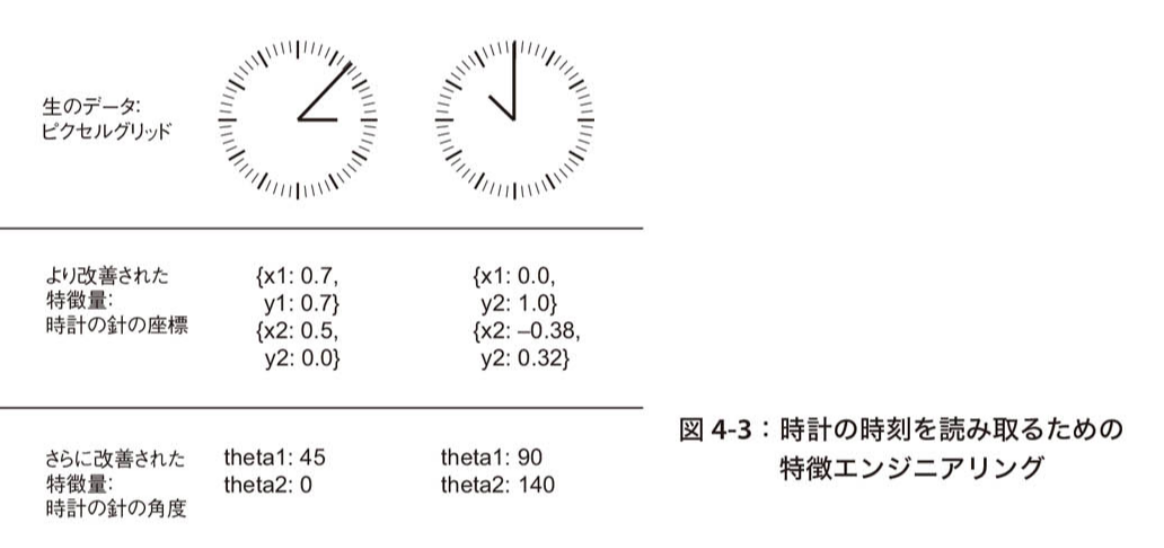

In [54]:
# 画像の表示
from IPython.display import Image
Image(filename='01.png', width=600)

### 過学習と学習不足